<a href="https://www.kaggle.com/code/eavprog/abscur-pairs-kvar?scriptVersionId=219318450" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Коэффициент вариации для парных валютных курсов**

См. страницу на сайте [https://www.abscur.ru/p/blog-page_77.html](https://www.abscur.ru/p/blog-page_77.html)


# Диапазоны

In [1]:
import pandas as pd

# Получение сегодняшней даты и вычисление дат в прошлом
today = pd.Timestamp.now().normalize()

days_ago_7 = today - pd.Timedelta(days=7)
month_ago = today - pd.DateOffset(months=1)
quarter_ago = today - pd.DateOffset(months=3)
half_year_ago = today - pd.DateOffset(months=6)
year_ago = today - pd.DateOffset(years=1)
two_years_ago = today - pd.DateOffset(years=2)
three_years_ago = today - pd.DateOffset(years=3)
five_years_ago = today - pd.DateOffset(years=5)
ten_years_ago = today - pd.DateOffset(years=10)

# Создание списка диапазонов и их расшифровок
date_ranges = [
    [month_ago, today, "месяц","1m"],
    [quarter_ago, today, "квартал","1q"],
    [half_year_ago, today, "полгода","y2"],
    [year_ago, today, "год","1y"],
    [two_years_ago, today, "два года","2y"],
    [three_years_ago, today, "три года","3y"],
    [five_years_ago, today, "пять лет","5y"],
    [ten_years_ago, today, "десять лет","10y"]
]

ago_dates = {item[2] : item[0] for item in date_ranges}
period_suffix = {item[2] : item[3] for item in date_ranges}

# Загрузка парных курсов

In [2]:
all_pairs = pd.read_csv('/kaggle/input/abscur2/pairs_close.csv',index_col='Date')
all_pairs.index = pd.to_datetime(all_pairs.index)
all_pairs

,AUDHKD,AUDJPY,AUDSEK,AUDUSD,CADJPY,CADSEK,CHFAUD,CHFHKD,CHFJPY,EURAUD,...,USDRUB,USDSAR,USDSEK,USDSGD,USDTHB,USDTRY,USDTWD,USDUAH,USDVND,USDZAR
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-25,6.1381,92.46000,6.5820,0.78759,94.200,6.6635,1.39890,8.5918,133.09000,1.41341,...,64.48500,3.7580,8.36040,1.34649,32.54,2.36296,31.343,15.49700,21320.0,11.45010
2015-01-26,6.1381,93.87030,6.5820,0.79221,94.959,6.6635,1.39890,8.5918,131.45000,1.41980,...,67.81000,3.7580,8.29077,1.34349,32.54,2.35601,31.318,15.34900,21320.0,11.45010
2015-01-27,6.1434,93.26150,6.4844,0.79214,94.990,6.5965,1.39650,8.5869,130.97819,1.43480,...,67.95500,3.7595,8.18620,1.33931,32.50,2.36314,31.233,15.34900,21320.0,11.56770
2015-01-28,6.1105,92.78060,6.5450,0.78927,93.873,6.6244,1.39990,8.5583,129.62970,1.42960,...,67.91500,3.7585,8.29740,1.35365,32.55,2.38692,31.321,15.65400,21320.0,11.57310
2015-01-29,6.0205,92.01400,6.4182,0.77821,93.728,6.5469,1.39380,8.4014,128.16110,1.45620,...,68.73500,3.7575,8.26040,1.35271,32.76,2.41549,31.502,15.64300,21275.0,11.54670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-20,4.8795,97.50200,6.9115,0.62810,108.536,7.6914,1.75558,8.5805,171.32201,1.65892,...,100.99718,3.7490,11.00340,1.35494,34.07,35.58010,32.316,41.84862,25315.0,18.51491
2025-01-21,4.8817,97.52800,6.8840,0.62620,108.602,7.6576,1.75920,8.5966,171.78207,1.66174,...,99.49526,3.7508,10.99279,1.35477,33.95,35.63490,32.584,41.72052,25260.0,18.49340
2025-01-22,4.8839,98.12600,6.8984,0.62750,108.690,7.6506,1.75265,8.5900,172.58832,1.65913,...,99.24761,3.7479,11.00367,1.35512,33.86,35.64470,32.612,41.73474,25050.0,18.46380


# Таблица коэффициентов вариации парных валютных курсов

In [3]:
import pandas as pd

# Создаем пустой DataFrame для хранения результатов
cv_values = pd.DataFrame()

# Вычисляем коэффициенты вариации для каждой валютной пары в заданных диапазонах
for range_name, start_date in ago_dates.items():
    # Определяем конец диапазона как следующий день после последней даты в all_pairs
    end_date = all_pairs.index.max() + pd.Timedelta(days=1)
    
    # Фильтруем данные по диапазону
    filtered_data = all_pairs.loc[start_date:end_date]
    
    # Вычисляем средние значения и стандартные отклонения
    means = filtered_data.mean()
    std_devs = filtered_data.std()
    
    # Вычисляем коэффициент вариации (CV)
    cv_values[range_name] = (std_devs / means) * 100  # Умножаем на 100 для получения в процентах

# Настройки отображения для вывода всех строк и столбцов
pd.set_option('display.max_rows', None)  # Выводить все строки
pd.set_option('display.max_columns', None)  # Выводить все столбцы

# Выводим результат
cv_values


,месяц,квартал,полгода,год,два года,три года,пять лет,десять лет
AUDHKD,0.675001,2.374692,3.242974,2.488030,2.648965,4.162259,6.090046,6.261892
AUDJPY,0.571638,1.640831,1.843481,3.200299,4.486115,5.132757,10.914285,9.763177
AUDSEK,0.468096,1.446915,1.250512,1.621103,1.836430,2.085527,4.985607,4.869450
AUDUSD,0.574163,2.388126,3.194159,2.433898,2.577352,4.079179,6.254868,6.370817
CADJPY,0.608002,1.189767,1.623681,2.904104,4.492808,5.621456,12.396113,11.765949
CADSEK,0.710561,0.896153,1.346091,1.539971,2.356979,2.762457,6.887203,7.828968
CHFAUD,0.583174,1.046897,1.215293,2.264706,3.139701,6.443832,7.254270,9.219391
CHFHKD,0.469642,1.677211,2.548883,2.337605,2.386676,4.040570,3.742713,4.671539
CHFJPY,0.823523,1.171918,1.407173,1.805103,5.863050,9.940281,16.170747,16.709366
EURAUD,0.409014,1.153376,1.149206,1.115552,1.795534,4.219179,4.011652,4.988020


# Рейтинги коэффициентов вариации парных валютных курсов

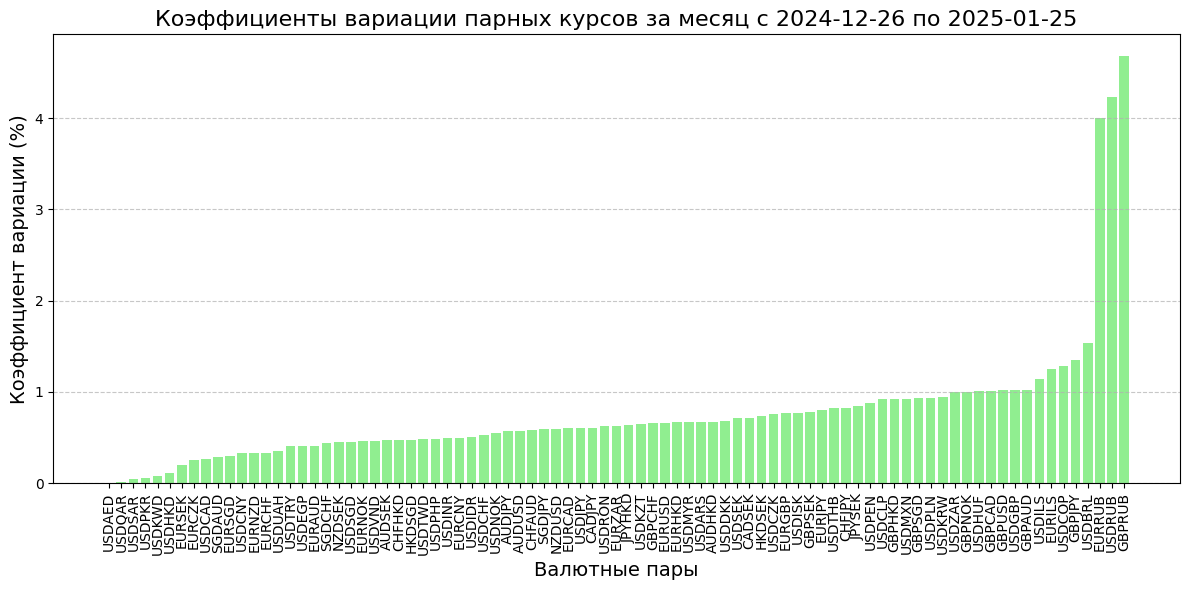

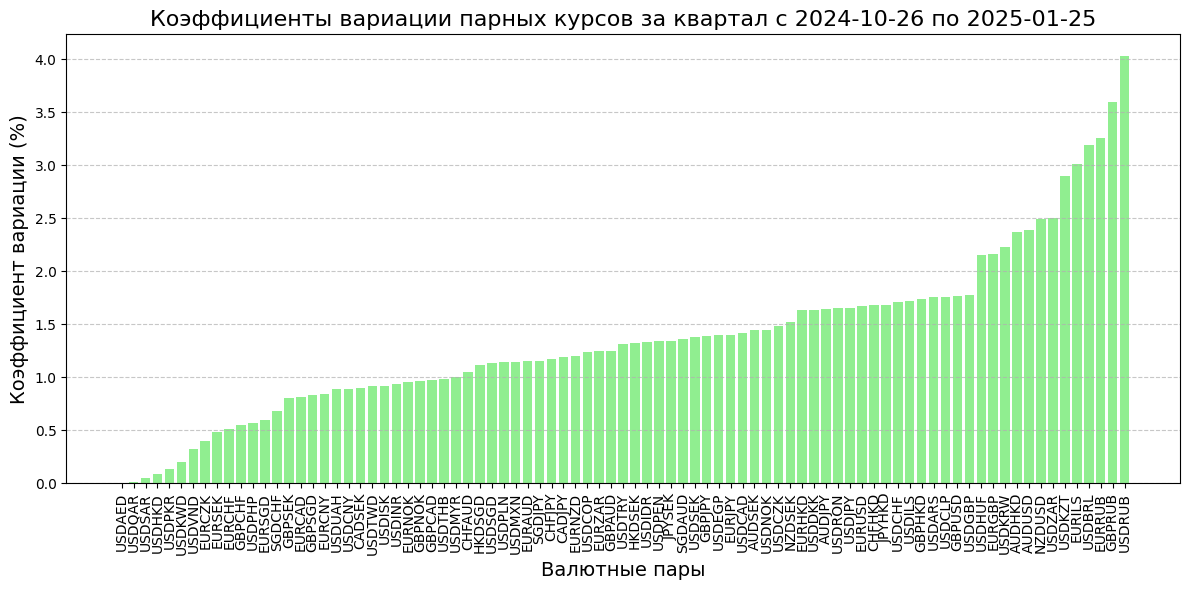

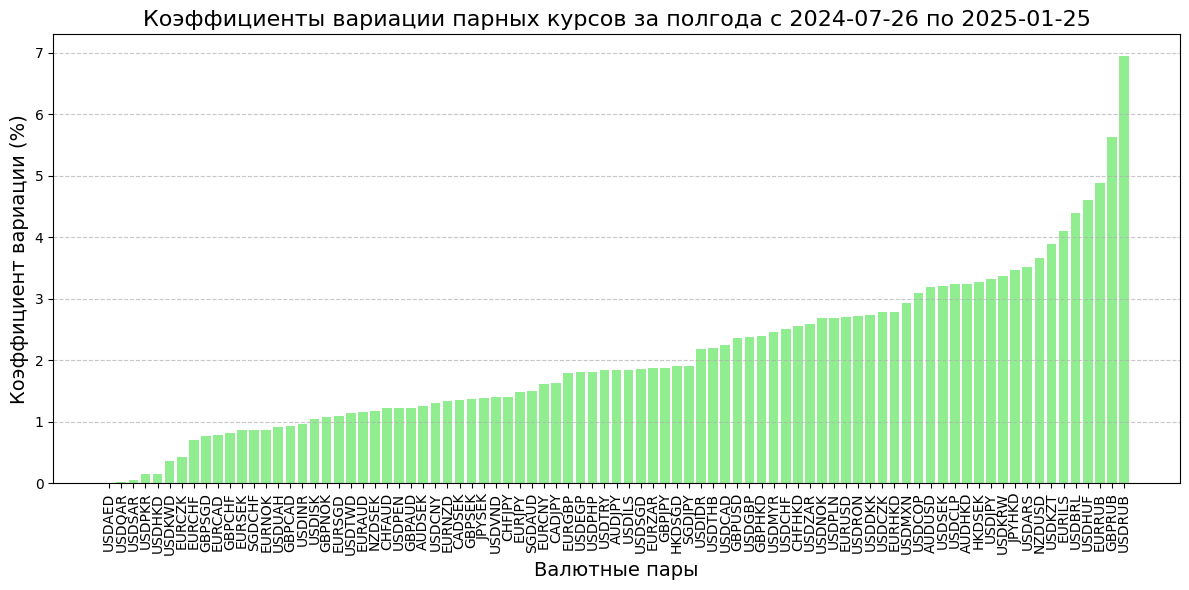

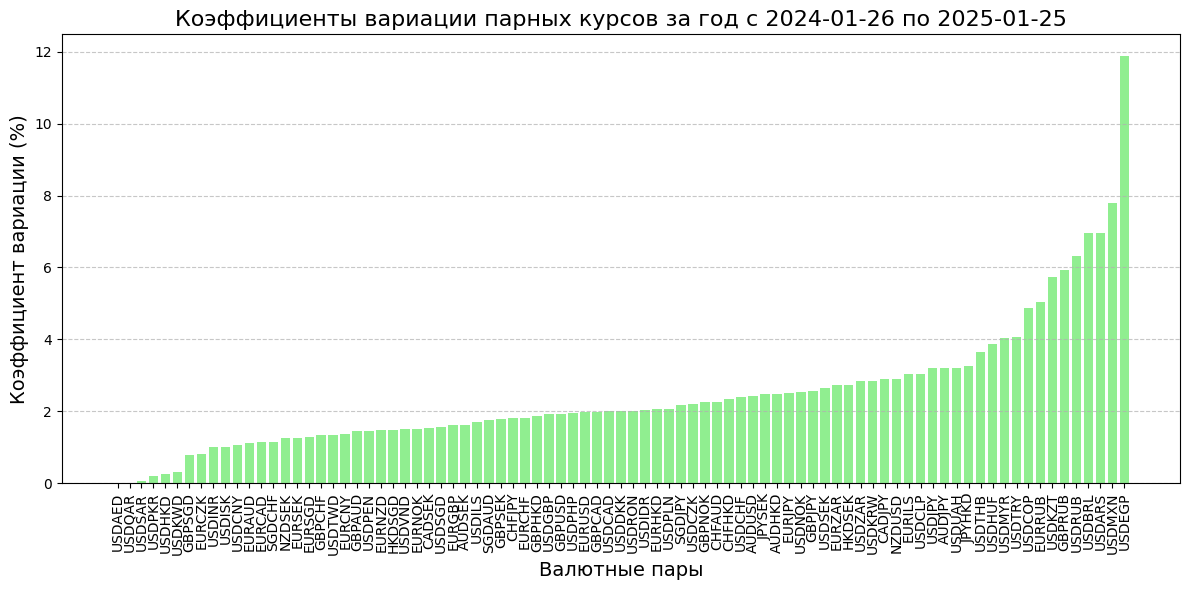

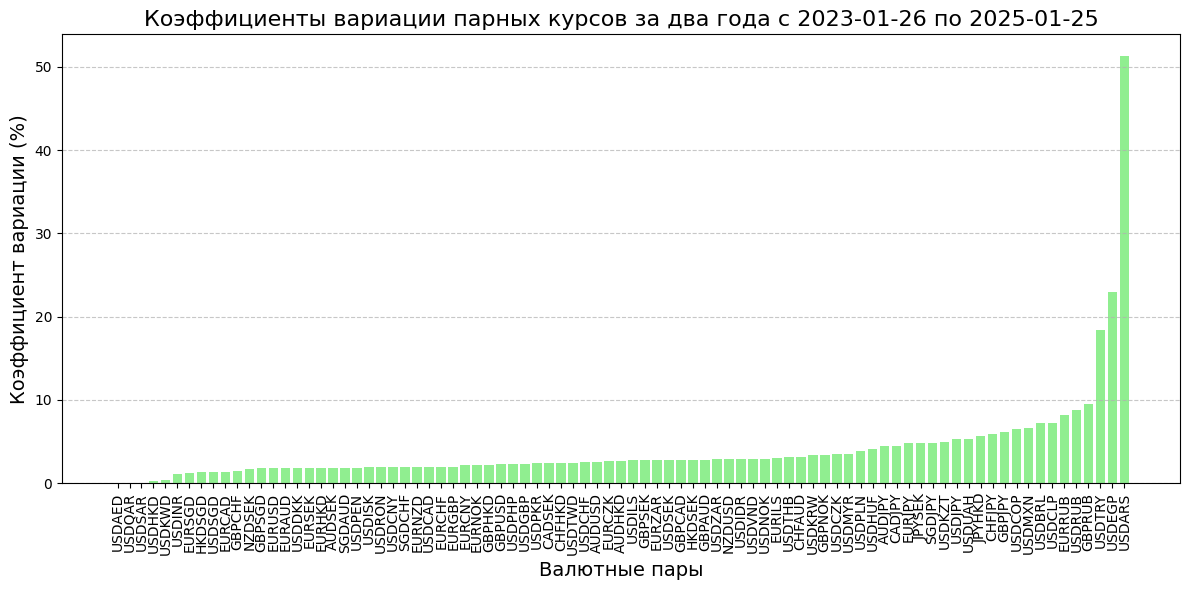

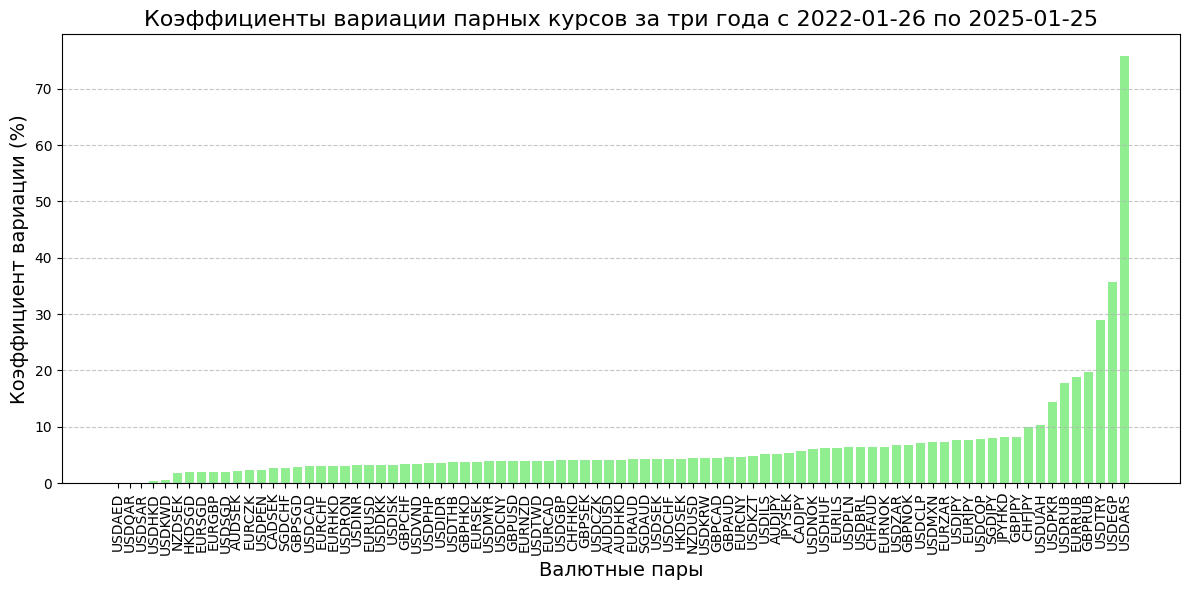

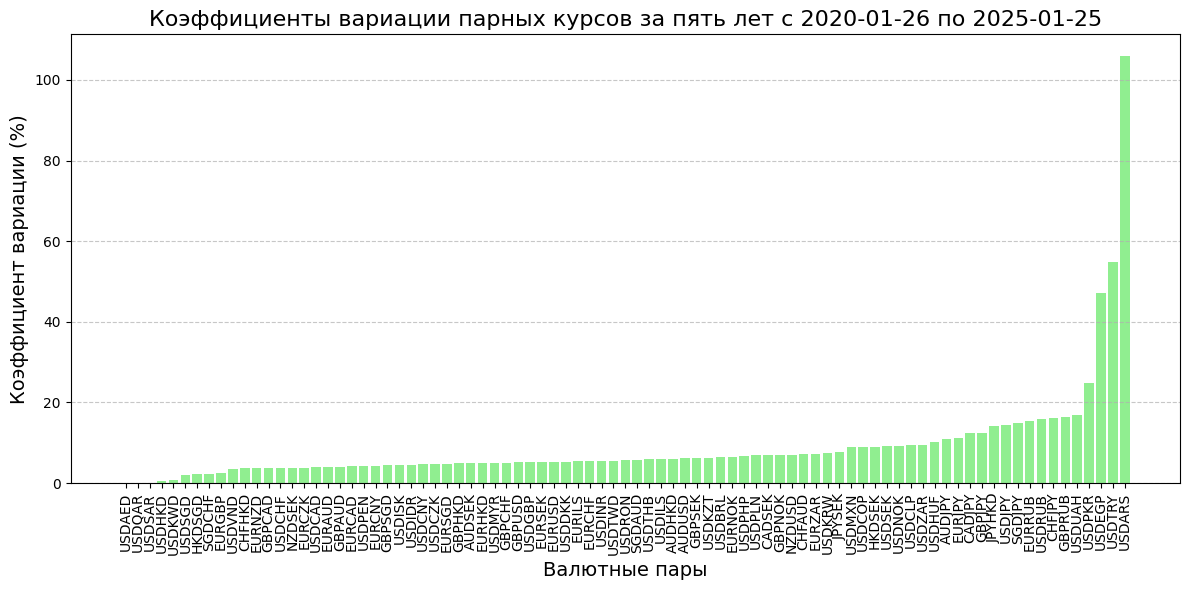

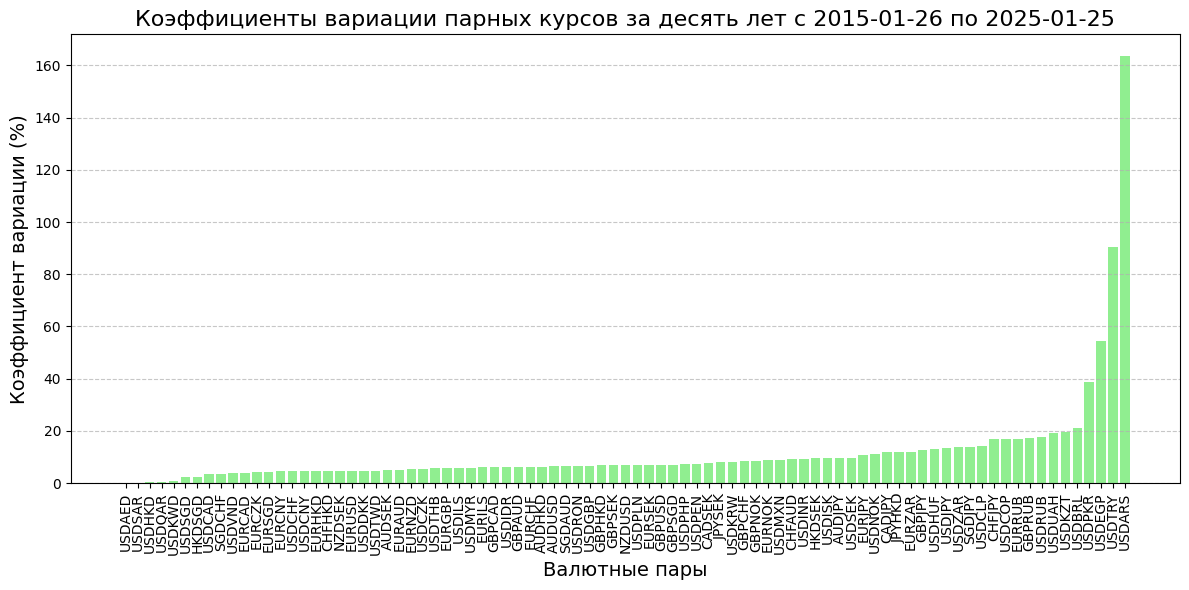

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Генерация столбчатых диаграмм для каждого диапазона коэффициентов вариации
for range_name in cv_values.columns:  # Цикл по колонкам (диапазонам)
    plt.figure(figsize=(12, 6))
    
    # Сортируем значения по возрастанию
    sorted_values = cv_values[range_name].sort_values()
    
    # Создаем столбчатую диаграмму
    plt.bar(sorted_values.index, sorted_values.values, color='lightgreen')
    
    # Определяем границы диапазона
    start_date = ago_dates[range_name]
    end_date = all_pairs.index.max() + pd.Timedelta(days=1)  # Конец диапазона
    
    # Настройки графика с границами диапазонов в заголовке
    plt.title(f'Коэффициенты вариации парных курсов за {range_name} с {start_date.date()} по {end_date.date()}', fontsize=16)
    plt.xlabel('Валютные пары', fontsize=14)
    plt.ylabel('Коэффициент вариации (%)', fontsize=14)
    
    # Поворот меток на оси X на 90 градусов
    plt.xticks(rotation=90)
    
    # Добавляем сетку для удобства чтения графика
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Отображаем график
    plt.tight_layout()
    plt.show()


# Генерация MD кода

In [5]:
import pandas as pd

# Генерация MD-кода для таблицы std_devs
md_table = cv_values.to_markdown(index=True)

print(md_table)

|        |      месяц |    квартал |    полгода |         год |    два года |    три года |     пять лет |   десять лет |
|:-------|-----------:|-----------:|-----------:|------------:|------------:|------------:|-------------:|-------------:|
| AUDHKD | 0.675001   | 2.37469    | 3.24297    |  2.48803    |  2.64897    |  4.16226    |   6.09005    |   6.26189    |
| AUDJPY | 0.571638   | 1.64083    | 1.84348    |  3.2003     |  4.48611    |  5.13276    |  10.9143     |   9.76318    |
| AUDSEK | 0.468096   | 1.44691    | 1.25051    |  1.6211     |  1.83643    |  2.08553    |   4.98561    |   4.86945    |
| AUDUSD | 0.574163   | 2.38813    | 3.19416    |  2.4339     |  2.57735    |  4.07918    |   6.25487    |   6.37082    |
| CADJPY | 0.608002   | 1.18977    | 1.62368    |  2.9041     |  4.49281    |  5.62146    |  12.3961     |  11.7659     |
| CADSEK | 0.710561   | 0.896153   | 1.34609    |  1.53997    |  2.35698    |  2.76246    |   6.8872     |   7.82897    |
| CHFAUD | 0.583174   | 

# Генерация HTML-кода

In [6]:
import pandas as pd

# Генерация HTML-кода для таблицы std_devs
html_table = cv_values.to_html(index=True, border=1, justify='right', escape=False)

# Добавление CSS для выравнивания и предотвращения переноса значений в ячейках
html_table = html_table.replace('<table', '<table style="table-layout: fixed; word-wrap: nowrap;"')

html_table = html_table.replace('\n', '')

# Выводим HTML-код
print(html_table)

<table style="table-layout: fixed; word-wrap: nowrap;" border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>месяц</th>      <th>квартал</th>      <th>полгода</th>      <th>год</th>      <th>два года</th>      <th>три года</th>      <th>пять лет</th>      <th>десять лет</th>    </tr>  </thead>  <tbody>    <tr>      <th>AUDHKD</th>      <td>0.675001</td>      <td>2.374692</td>      <td>3.242974</td>      <td>2.488030</td>      <td>2.648965</td>      <td>4.162259</td>      <td>6.090046</td>      <td>6.261892</td>    </tr>    <tr>      <th>AUDJPY</th>      <td>0.571638</td>      <td>1.640831</td>      <td>1.843481</td>      <td>3.200299</td>      <td>4.486115</td>      <td>5.132757</td>      <td>10.914285</td>      <td>9.763177</td>    </tr>    <tr>      <th>AUDSEK</th>      <td>0.468096</td>      <td>1.446915</td>      <td>1.250512</td>      <td>1.621103</td>      <td>1.836430</td>      <td>2.085527</td>      <td>4.985607</td>      <td>4.869450